IMPORT LIBRARY

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import quandl
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

READ FILES

In [8]:
url1 = 'https://raw.githubusercontent.com/ridart44/Coca-cola-and-Pepsi-Stock-Price/master/Pepsi.csv'
url2 = 'https://raw.githubusercontent.com/ridart44/Coca-cola-and-Pepsi-Stock-Price/master/Coca-Cola.csv'
df_pepsi = pd.read_csv(url1, error_bad_lines=False)
df_coca_cola = pd.read_csv(url2, error_bad_lines=False)

CONVERT DATE FORMAT

In [9]:
df_pepsi['Date'] = pd.to_datetime(df_pepsi['Date'])
df_coca_cola['Date'] = pd.to_datetime(df_coca_cola['Date'])

PREVIEW DATA

In [10]:
df_pepsi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,35.3750,37.3750,35.0000,36.8750,22.625731,5298400
1,2000-01-04,36.5625,37.5625,35.7500,35.9375,22.050493,4555700
2,2000-01-05,35.8125,36.3125,34.8750,35.0625,21.513603,5701900
3,2000-01-06,34.7500,36.8750,34.5000,36.6250,22.472326,6863100
4,2000-01-07,36.8750,38.6250,36.6875,37.6250,23.085907,10527800


In [15]:
df_coca_cola.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,29.00000,29.00000,27.62500,28.18750,12.120768,10997000
1,2000-01-04,28.18750,28.40625,27.81250,28.21875,12.134203,7308000
2,2000-01-05,28.21875,28.71875,28.03125,28.46875,12.241712,9457400
3,2000-01-06,28.46875,28.84375,28.28125,28.50000,12.255146,7129200
4,2000-01-07,28.93750,30.37500,28.93750,30.37500,13.061407,11474000


PLOTTING COCA-COLA STOCK PRICE

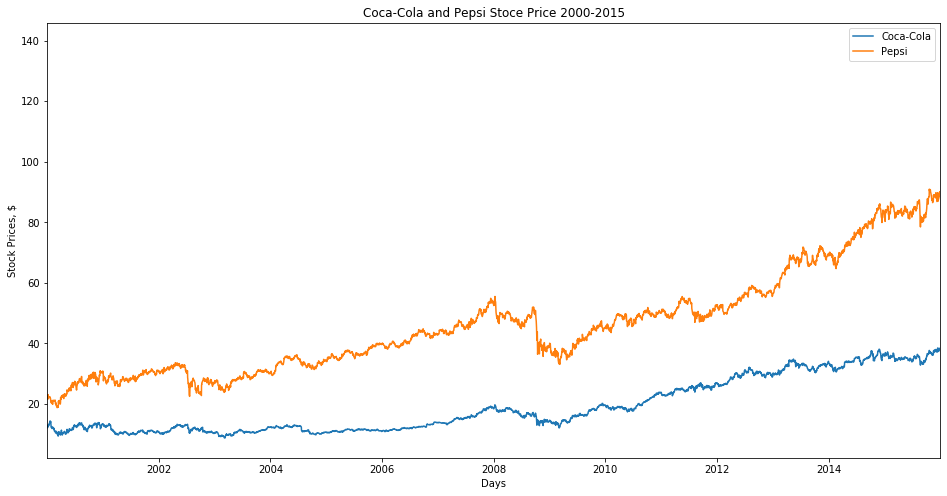

In [18]:
plt.figure(figsize=(16,8))
plt.plot(df_coca_cola['Date'], df_coca_cola['Adj Close'],label='Coca-Cola')
plt.plot(df_pepsi['Date'], df_pepsi['Adj Close'],label = 'Pepsi')
plt.xlim('1/2/2000','12/31/2015')
plt.xlabel('Days')
plt.ylabel('Stock Prices, $')
plt.title('Coca-Cola and Pepsi Stoce Price 2000-2015')
plt.legend()
plt.show()

# MODELLING GBM

COMPONENTS IN GEOMETRIC BROWNIAN MOTION

DRIFT COEFFICIENT IS THE LONGER-TERM TEREND IN THE STOCK PRICES.
DIFFUSION COEFFICIENT IS THE SHORTER-TERM RANDOM FLUCTUATIONS.

DATE LENGTH FOR FURTHER CALCULATION

In [45]:
pepsi_adj_close = df_pepsi['Adj Close']
coca_cola_adj_close = df_coca_cola['Adj Close']
print("Coca-Cola Date Length :",len(coca_cola_adj_close))
print("Pepsi Date Length     :",len(pepsi_adj_close))

Coca-Cola Date Length : 5021
Pepsi Date Length     : 5021


DETERMINE DRIFT AND DIFFUSION COEFFICIENT.

In [20]:
def coca_cola_daily_return(coca_cola_adj_close):
    returns = []
    for i in range(0, len(coca_cola_adj_close)-1):
        today = coca_cola_adj_close[i+1]
        yesterday = coca_cola_adj_close[i]
        coca_cola_daily_return = (today - yesterday)/yesterday
        returns.append(coca_cola_daily_return)
    return returns

returns = coca_cola_daily_return(coca_cola_adj_close)

coca_cola_mu = np.mean(returns)*5021.           # drift coefficient
coca_cola_sig = np.std(returns)*np.sqrt(5021.)  # diffusion coefficient

print("Coca-Cola Drift Coefficient     :",coca_cola_mu)
print("Coca-Cola Diffusion Coefficient :",coca_cola_sig)

def pepsi_daily_return(pepsi_adj_close):
    returns = []
    for i in range(0, len(pepsi_adj_close)-1):
        today = pepsi_adj_close[i+1]
        yesterday = pepsi_adj_close[i]
        pepsi_daily_return = (today - yesterday)/yesterday
        returns.append(pepsi_daily_return)
    return returns

returns = pepsi_daily_return(pepsi_adj_close)

pepsi_mu = np.mean(returns)*5021.           # drift coefficient
pepsi_sig = np.std(returns)*np.sqrt(5021.)  # diffusion coefficient

print("Pepsi Drift Coefficient         :",pepsi_mu)
print("Pepsi Diffusion Coefficient     :",pepsi_sig)



Coca-Cola Drift Coefficient     : 1.921168480760642
Coca-Cola Diffusion Coefficient : 0.913039296723384
Pepsi Drift Coefficient         : 2.175383627847461
Pepsi Diffusion Coefficient     : 0.8625887704494086


GBM MODEL

In [21]:
# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments
def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1./N                                    # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b

def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,N+1)
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t



COCA-COLA AND PEPSI GBM MODEL SEED = 22

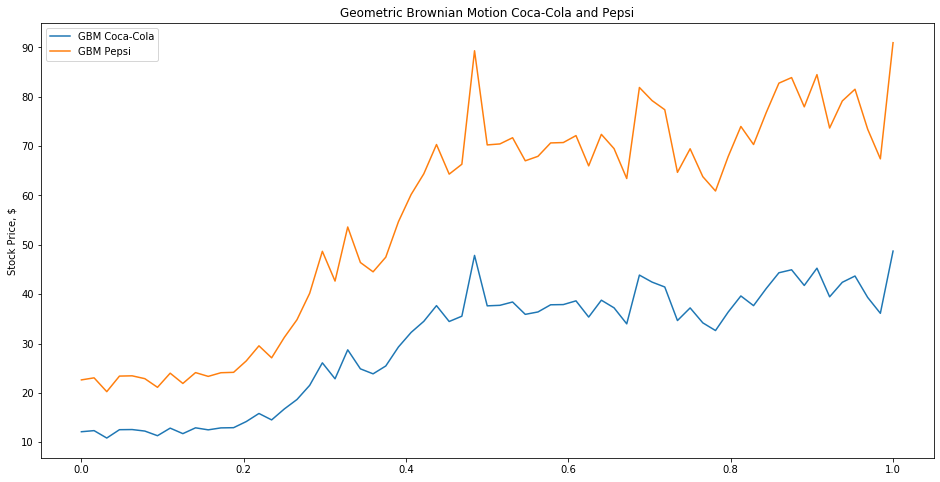

In [25]:
seed = 22
coca_cola_So = coca_cola_adj_close[0] 
pepsi_So = pepsi_adj_close[0]
N = 2.**6
T = 1.
W = Brownian(seed, N)[0]
plt.figure(figsize=(16,8))
coca_cola_soln = GBM(coca_cola_So, pepsi_mu, pepsi_sig, W, T, N)[0]    # Exact solution
coca_cola_t = GBM(coca_cola_So, coca_cola_mu, coca_cola_sig, W, T, N)[1]       # time increments for  plotting
plt.plot(coca_cola_t,coca_cola_soln,label='GBM Coca-Cola')
pepsi_soln = GBM(pepsi_So, pepsi_mu, pepsi_sig, W, T, N)[0]
pepsi_t = GBM(pepsi_So, pepsi_mu, pepsi_sig, W, T, N)[1]
plt.plot(pepsi_t,pepsi_soln,label='GBM Pepsi')
plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion Coca-Cola and Pepsi')
plt.legend()
plt.show()

# COMPARE COCA-COLA GBM WITH COCA-COLA ACTUAL DATA (SEED = 22)

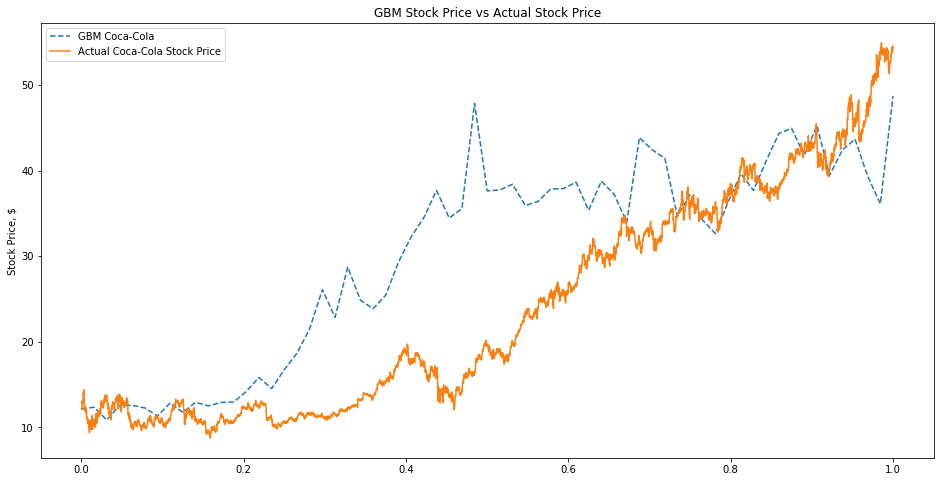

In [26]:
plt.figure(figsize=(16,8))
coca_cola_soln = GBM(coca_cola_So, pepsi_mu, pepsi_sig, W, T, N)[0]    # Exact solution
coca_cola_t = GBM(coca_cola_So, coca_cola_mu, coca_cola_sig, W, T, N)[1]       # time increments for  plotting
plt.plot(coca_cola_t,coca_cola_soln,label='GBM Coca-Cola',ls='--')

coca_cola_time = np.linspace(1, len(coca_cola_adj_close), len(coca_cola_adj_close))
coca_cola_time = [i/5021. for i in coca_cola_time]

plt.plot(coca_cola_time, coca_cola_adj_close, label = 'Actual Coca-Cola Stock Price')

plt.ylabel('Stock Price, $')
plt.title('GBM Stock Price vs Actual Stock Price')
plt.legend()
plt.show()

COMPARE PEPSI GBM WITH PEPSI ACTUAL DATA (SEED = 22)

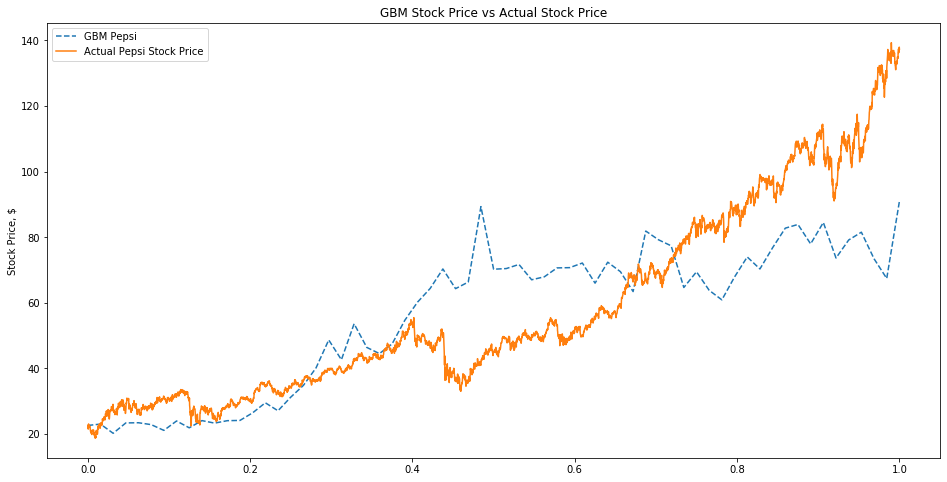

In [27]:
plt.figure(figsize=(16,8))
pepsi_soln = GBM(pepsi_So, pepsi_mu, pepsi_sig, W, T, N)[0]
pepsi_t = GBM(pepsi_So, pepsi_mu, pepsi_sig, W, T, N)[1]
plt.plot(pepsi_t,pepsi_soln,label='GBM Pepsi',ls='--')
pepsi_time = np.linspace(1, len(pepsi_adj_close), len(pepsi_adj_close))
pepsi_time = [i/5021. for i in pepsi_time]
plt.plot(pepsi_time, pepsi_adj_close, label = 'Actual Pepsi Stock Price')
plt.ylabel('Stock Price, $')
plt.title('GBM Stock Price vs Actual Stock Price')
plt.legend()
plt.show()

USING MINIMUM SEED (1)

COCA-COLA AND PEPSI GBM MODEL SEED = 1

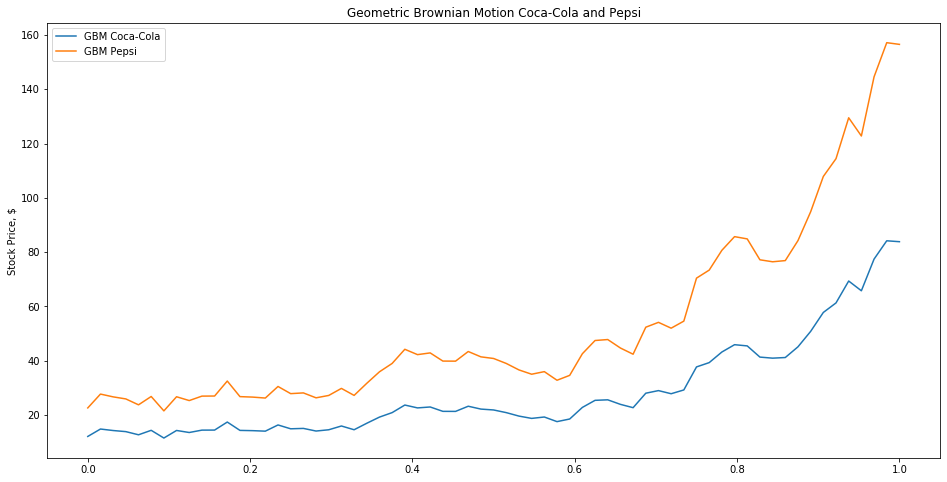

In [29]:
plt.figure(figsize=(16,8))
seed =1 
W = Brownian(seed, N)[0]
coca_cola_soln = GBM(coca_cola_So, pepsi_mu, pepsi_sig, W, T, N)[0]    # Exact solution
coca_cola_t = GBM(coca_cola_So, coca_cola_mu, coca_cola_sig, W, T, N)[1]       # time increments for  plotting
plt.plot(coca_cola_t,coca_cola_soln,label='GBM Coca-Cola')
pepsi_soln = GBM(pepsi_So, pepsi_mu, pepsi_sig, W, T, N)[0]
pepsi_t = GBM(pepsi_So, pepsi_mu, pepsi_sig, W, T, N)[1]
plt.plot(pepsi_t,pepsi_soln,label='GBM Pepsi')
plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion Coca-Cola and Pepsi')
plt.legend()
plt.show()

COMPARE COCA-COLA GBM WITH COCA-COLA ACTUAL DATA (SEED = 1)

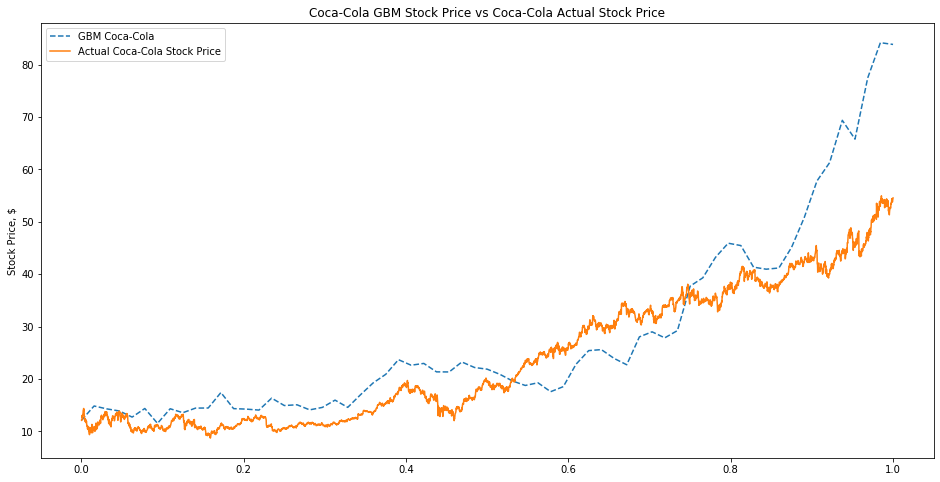

In [30]:
plt.figure(figsize=(16,8))
seed =1 
W = Brownian(seed, N)[0]
coca_cola_soln = GBM(coca_cola_So, pepsi_mu, pepsi_sig, W, T, N)[0]    # Exact solution
coca_cola_t = GBM(coca_cola_So, coca_cola_mu, coca_cola_sig, W, T, N)[1]       # time increments for  plotting
plt.plot(coca_cola_t,coca_cola_soln,label='GBM Coca-Cola',ls='--')

coca_cola_time = np.linspace(1, len(coca_cola_adj_close), len(coca_cola_adj_close))
coca_cola_time = [i/5021. for i in coca_cola_time]

plt.plot(coca_cola_time, coca_cola_adj_close, label = 'Actual Coca-Cola Stock Price')

plt.ylabel('Stock Price, $')
plt.title('Coca-Cola GBM Stock Price vs Coca-Cola Actual Stock Price')
plt.legend()
plt.show()

COMPARE PEPSI GBM WITH PEPSI ACTUAL DATA (SEED = 1)

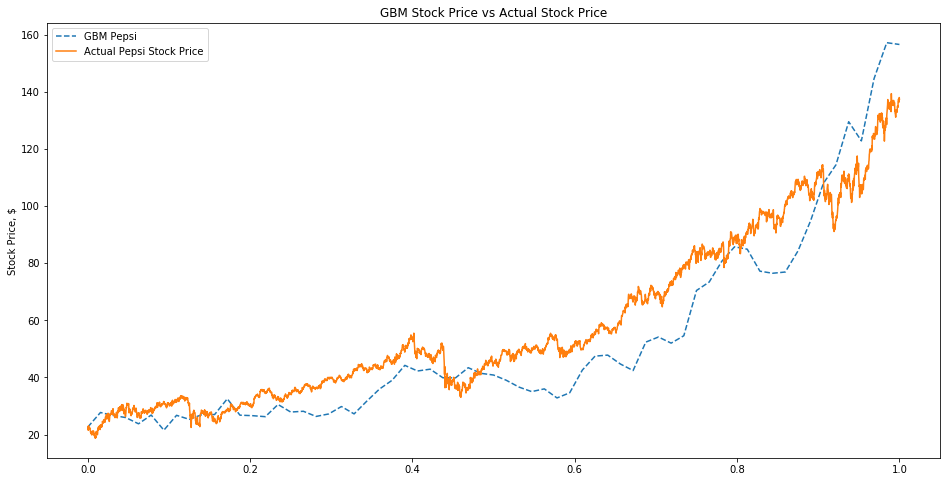

In [31]:
plt.figure(figsize=(16,8))
seed =1 
W = Brownian(seed, N)[0]
pepsi_soln = GBM(pepsi_So, pepsi_mu, pepsi_sig, W, T, N)[0]
pepsi_t = GBM(pepsi_So, pepsi_mu, pepsi_sig, W, T, N)[1]
plt.plot(pepsi_t,pepsi_soln,label='GBM Pepsi',ls='--')
pepsi_time = np.linspace(1, len(pepsi_adj_close), len(pepsi_adj_close))
pepsi_time = [i/5021. for i in pepsi_time]
plt.plot(pepsi_time, pepsi_adj_close, label = 'Actual Pepsi Stock Price')
plt.ylabel('Stock Price, $')
plt.title('GBM Stock Price vs Actual Stock Price')
plt.legend()
plt.show()

# EULER MARUYAMA MODEL

EULER MARUYAMA MODEL USED TO to APPROXIMATE THE PATH

COCA-COLA STOCK PRICE

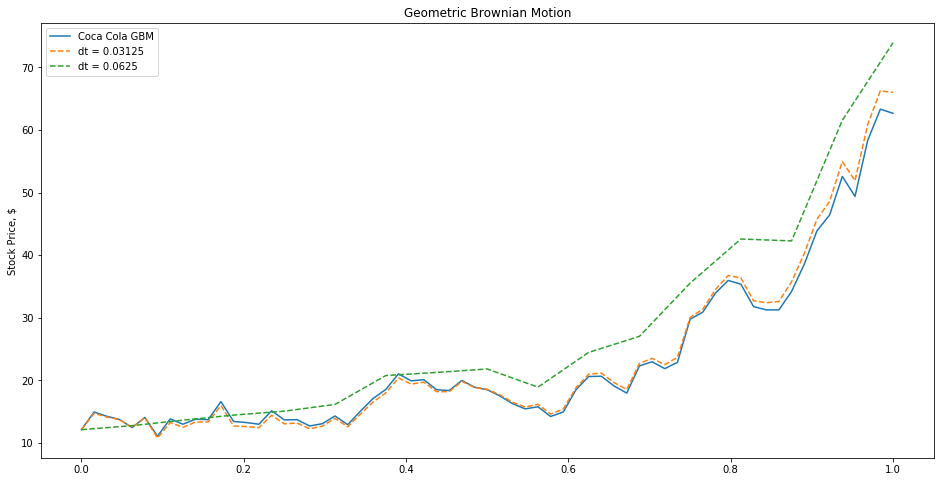

In [47]:
plt.figure(figsize=(16,8))
# Exact solution - GBM Model
seed = 1
coca_cola_So = coca_cola_adj_close[0]            # Initial Coca-Cola stock price (01/01/2016)
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

coca_cola_soln = GBM(coca_cola_So, coca_cola_mu, coca_cola_sig, W, T, N)[0]    # Exact solution
coca_cola_t = GBM(coca_cola_So, coca_cola_mu, coca_cola_sig, W, T, N)[1]       # time increments for  plotting
plt.plot(coca_cola_t, coca_cola_soln, label ='Coca Cola GBM')


# Euler Maruyama Approximation
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    L = N / M
    wi = [So]
    for i in range(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt


# Changing the time step sizes
#
# dt = 0.03125
b = Brownian(1, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1 = EM(coca_cola_So,coca_cola_mu, coca_cola_sig, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,L+1)

# dt = 0.0625
b = Brownian(1, N)[1]    # Brownian increments 
M = 4                    
L = N/M
EM_approx_2 = EM(coca_cola_So, coca_cola_mu, coca_cola_sig, b, T, N, M)[0]
time_EM_2 = np.linspace(0.,1.,L+1)


plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.03125', ls ='--')
plt.plot(time_EM_2, EM_approx_2, label = 'dt = 0.0625', ls ='--')


plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion')

plt.legend(loc = 'upper left')
plt.show()

AS YOU CAN SEE ABOVE THE PATH APPROXIMATION IS CLOSE TO ACTUAL STOCK PRICE WITH DT 0.03125 GIVES BETTER APPROXIMATION

PEPSI STOCK PRICE

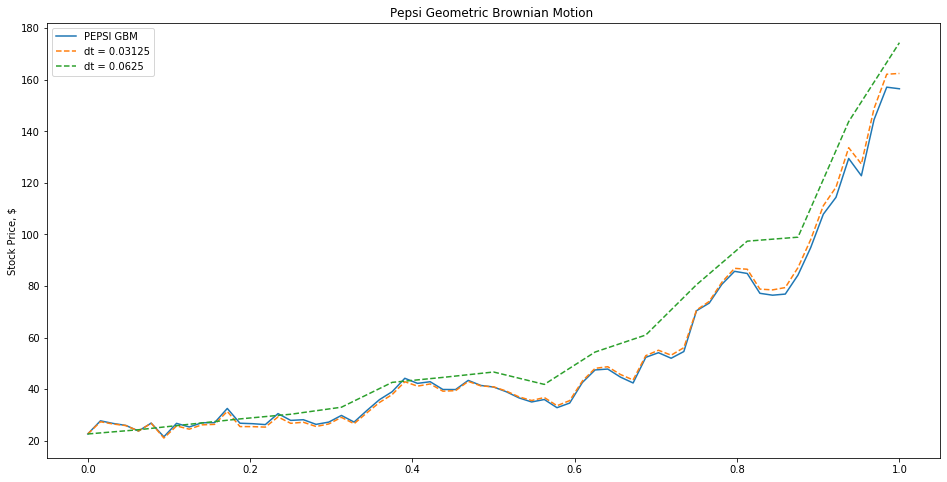

In [36]:
plt.figure(figsize=(16,8))
# Exact solution - GBM Model
seed = 1
pepsi_So = pepsi_adj_close[0]            # Initial pepsi stock price (01/01/2016)
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

pepsi_soln = GBM(pepsi_So, pepsi_mu, pepsi_sig, W, T, N)[0]    # Exact solution
pepsi_t = GBM(pepsi_So, pepsi_mu, pepsi_sig, W, T, N)[1]       # time increments for  plotting
plt.plot(pepsi_t, pepsi_soln, label ='PEPSI GBM')


# Euler Maruyama Approximation
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    L = N / M
    wi = [So]
    for i in range(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt


# Changing the time step sizes
#
# dt = 0.03125
b = Brownian(1, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1 = EM(pepsi_So, pepsi_mu, pepsi_sig, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,L+1)

# dt = 0.0625
b = Brownian(1, N)[1]    # Brownian increments 
M = 4                    
L = N/M
EM_approx_2 = EM(pepsi_So, pepsi_mu, pepsi_sig, b, T, N, M)[0]
time_EM_2 = np.linspace(0.,1.,L+1)


plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.03125', ls ='--')
plt.plot(time_EM_2, EM_approx_2, label = 'dt = 0.0625', ls ='--')


plt.ylabel('Stock Price, $')
plt.title('Pepsi Geometric Brownian Motion ')

plt.legend(loc = 'upper left')
plt.show()

AS YOU CAN SEE ABOVE THE PATH APPROXIMATION IS CLOSE TO ACTUAL STOCK PRICE WITH DT 0.03125 GIVES BETTER APPROXIMATION